In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

Neighbors: 1, Accuracy: 0.750055
Neighbors: 3, Accuracy: 0.758689
Neighbors: 5, Accuracy: 0.774186
Neighbors: 7, Accuracy: 0.783042
Neighbors: 9, Accuracy: 0.785477
Neighbors: 11, Accuracy: 0.794997
Neighbors: 13, Accuracy: 0.796325
Neighbors: 15, Accuracy: 0.798539
Neighbors: 17, Accuracy: 0.799867
Neighbors: 19, Accuracy: 0.799203
Neighbors: 21, Accuracy: 0.802524
Neighbors: 23, Accuracy: 0.802302
Neighbors: 25, Accuracy: 0.804295
Neighbors: 27, Accuracy: 0.804074
Neighbors: 29, Accuracy: 0.805402
Neighbors: 31, Accuracy: 0.805623
Neighbors: 33, Accuracy: 0.805623
Neighbors: 35, Accuracy: 0.805402
Neighbors: 37, Accuracy: 0.805402
Neighbors: 39, Accuracy: 0.805402
Neighbors: 41, Accuracy: 0.806066
Neighbors: 43, Accuracy: 0.805845
Neighbors: 45, Accuracy: 0.805845
Neighbors: 47, Accuracy: 0.805845
Neighbors: 49, Accuracy: 0.805845


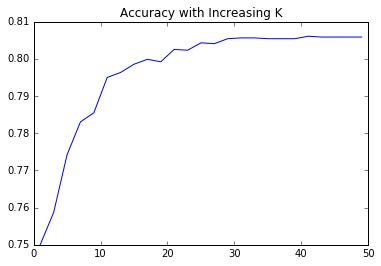

In [6]:
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
 
test_idx = np.random.uniform(0, 1, len(df)) <= 0.3
train = df[test_idx==True]
test = df[test_idx==False]

features = ['density', 'sulphates', 'residual_sugar']
 
results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[features], train['high_quality'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['high_quality'], 1, 0).sum() / float(len(test))
    print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))
 
    results.append([n, accuracy])
 
results = pd.DataFrame(results, columns=["n", "accuracy"])
 
pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()